In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("../csv_files/sign_mnist_train.csv")
test_df = pd.read_csv("../csv_files/sign_mnist_test.csv")

In [3]:
print('Training data shape : ', train_df.shape)

print('Testing data shape : ', test_df.shape)

Training data shape :  (27455, 785)
Testing data shape :  (7172, 785)


In [4]:
train_images = train_df.loc[:, "pixel1":"pixel784"].values.reshape(27455, 28, 28, 1)/255.0
train_labels = train_df.loc[:, "label"].values
test_images = test_df.loc[:, "pixel1":"pixel784"].values.reshape(7172, 28, 28, 1)/255.0
test_labels = test_df.loc[:, "label"].values

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.layers import Dropout

In [6]:
first_mod = models.Sequential()
first_mod.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
first_mod.add(layers.MaxPooling2D((2, 2)))
first_mod.add(layers.Conv2D(32, (3, 3), activation='relu'))
first_mod.add(layers.Flatten())
first_mod.add(layers.Dense(32, activation='relu'))
first_mod.add(layers.Dense(25))

In [7]:
first_mod.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 3872)              0         
                                                                 
 dense (Dense)               (None, 32)                123936    
                                                                 
 dense_1 (Dense)             (None, 25)                825       
                                                        

In [8]:
first_mod.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

first_history = first_mod.fit(train_images, train_labels, 
          validation_data = (test_images, test_labels), 
          epochs= 10, batch_size= 10)

Epoch 1/10
2746/2746 [==============================] - 12s 4ms/step - loss: 1.2780 - accuracy: 0.5834 - val_loss: 1.2029 - val_accuracy: 0.6276
Epoch 2/10
2746/2746 [==============================] - 11s 4ms/step - loss: 0.2932 - accuracy: 0.9068 - val_loss: 1.0525 - val_accuracy: 0.7252
Epoch 3/10
2746/2746 [==============================] - 11s 4ms/step - loss: 0.0947 - accuracy: 0.9743 - val_loss: 1.3715 - val_accuracy: 0.7567
Epoch 4/10
2746/2746 [==============================] - 11s 4ms/step - loss: 0.0403 - accuracy: 0.9893 - val_loss: 2.1570 - val_accuracy: 0.6821
Epoch 5/10
2746/2746 [==============================] - 12s 4ms/step - loss: 0.0258 - accuracy: 0.9928 - val_loss: 1.5230 - val_accuracy: 0.7761
Epoch 6/10
2746/2746 [==============================] - 12s 4ms/step - loss: 0.0260 - accuracy: 0.9928 - val_loss: 1.5540 - val_accuracy: 0.7789
Epoch 7/10
2746/2746 [==============================] - 11s 4ms/step - loss: 0.0117 - accuracy: 0.9971 - val_loss: 1.8074 - val_ac

225/225 - 1s - loss: 1.7477 - accuracy: 0.7853 - 629ms/epoch - 3ms/step


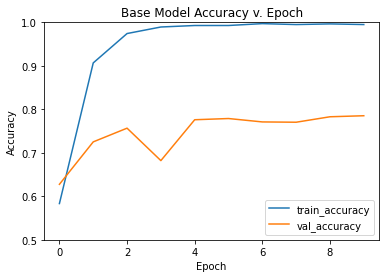

In [9]:
plt.plot(first_history.history['accuracy'], label='train_accuracy')
plt.plot(first_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Base Model Accuracy v. Epoch')
test_loss, test_acc = first_mod.evaluate(test_images,  test_labels, verbose=2)
plt.savefig("first_mod.png")

Adding another convolutional layer and padding in order to maintain the overall size of the matrices

In [10]:
padding_mod = models.Sequential()
padding_mod.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding = "same"))
padding_mod.add(layers.MaxPooling2D((2, 2)))
padding_mod.add(layers.Conv2D(32, (3, 3), activation='relu',padding = "same"))
padding_mod.add(layers.MaxPooling2D((2, 2)))
padding_mod.add(layers.Conv2D(32, (3, 3), activation='relu', padding = "same"))
padding_mod.add(layers.Flatten())
padding_mod.add(layers.Dense(32, activation='relu'))
padding_mod.add(layers.Dense(25))

In [11]:
padding_mod.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 flatten_1 (Flatten)         (None, 1568)             

In [12]:
padding_mod.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

padding_history = padding_mod.fit(train_images, train_labels, 
          validation_data = (test_images, test_labels), 
          epochs= 10, batch_size= 10)

Epoch 1/10
2746/2746 [==============================] - 17s 6ms/step - loss: 0.9255 - accuracy: 0.7081 - val_loss: 0.5683 - val_accuracy: 0.8509
Epoch 2/10
2746/2746 [==============================] - 17s 6ms/step - loss: 0.0667 - accuracy: 0.9805 - val_loss: 0.6402 - val_accuracy: 0.8724
Epoch 3/10
2746/2746 [==============================] - 16s 6ms/step - loss: 0.0309 - accuracy: 0.9908 - val_loss: 0.7596 - val_accuracy: 0.8351
Epoch 4/10
2746/2746 [==============================] - 15s 6ms/step - loss: 0.0151 - accuracy: 0.9954 - val_loss: 0.8584 - val_accuracy: 0.8537
Epoch 5/10
2746/2746 [==============================] - 15s 6ms/step - loss: 0.0163 - accuracy: 0.9949 - val_loss: 0.5630 - val_accuracy: 0.9120
Epoch 6/10
2746/2746 [==============================] - 15s 5ms/step - loss: 1.8494e-04 - accuracy: 1.0000 - val_loss: 0.5772 - val_accuracy: 0.9194
Epoch 7/10
2746/2746 [==============================] - 15s 5ms/step - loss: 0.0146 - accuracy: 0.9953 - val_loss: 0.5319 - va

225/225 - 1s - loss: 0.6142 - accuracy: 0.9258 - 847ms/epoch - 4ms/step


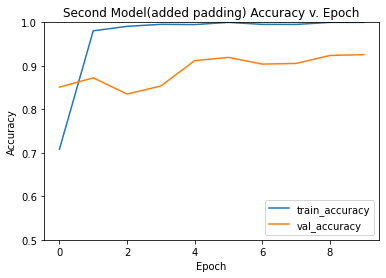

In [43]:
plt.plot(padding_history.history['accuracy'], label='train_accuracy')
plt.plot(padding_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Second Model(added padding) Accuracy v. Epoch')
test_loss, test_acc = padding_mod.evaluate(test_images,  test_labels, verbose=2)
plt.savefig("padding_mod.png")

Adding additional Convolutional Layer and dropout as a method of regularization

In [14]:
dropout_mod = models.Sequential()
dropout_mod.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
dropout_mod.add(layers.MaxPooling2D((2, 2),padding = 'same'))
dropout_mod.add(Dropout(0.2))
dropout_mod.add(layers.Conv2D(32, (3, 3), activation='relu'))
dropout_mod.add(layers.MaxPooling2D((2, 2),padding = 'same'))
dropout_mod.add(Dropout(0.2))
dropout_mod.add(layers.Conv2D(32, (3, 3), activation='relu'))
dropout_mod.add(layers.MaxPooling2D((2, 2),padding = 'same'))
dropout_mod.add(Dropout(0.2))
dropout_mod.add(layers.Conv2D(64, (2, 2), activation='relu'))
dropout_mod.add(layers.MaxPooling2D((2, 2),padding = 'same'))
dropout_mod.add(Dropout(0.2))
dropout_mod.add(layers.Flatten())
dropout_mod.add(layers.Dense(64, activation='relu'))
dropout_mod.add(layers.Dense(25))

In [15]:
dropout_mod.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 32)         

In [16]:
dropout_mod.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

dropout_history = dropout_mod.fit(train_images, train_labels, 
          validation_data = (test_images, test_labels), 
          epochs= 10, batch_size= 10)

Epoch 1/10
2746/2746 [==============================] - 16s 6ms/step - loss: 1.7900 - accuracy: 0.4218 - val_loss: 0.6023 - val_accuracy: 0.7914
Epoch 2/10
2746/2746 [==============================] - 15s 6ms/step - loss: 0.6377 - accuracy: 0.7720 - val_loss: 0.3372 - val_accuracy: 0.8954
Epoch 3/10
2746/2746 [==============================] - 15s 5ms/step - loss: 0.3937 - accuracy: 0.8630 - val_loss: 0.2325 - val_accuracy: 0.9324
Epoch 4/10
2746/2746 [==============================] - 17s 6ms/step - loss: 0.2939 - accuracy: 0.8985 - val_loss: 0.2218 - val_accuracy: 0.9328
Epoch 5/10
2746/2746 [==============================] - 16s 6ms/step - loss: 0.2454 - accuracy: 0.9162 - val_loss: 0.1514 - val_accuracy: 0.9596
Epoch 6/10
2746/2746 [==============================] - 17s 6ms/step - loss: 0.2026 - accuracy: 0.9321 - val_loss: 0.1652 - val_accuracy: 0.9395
Epoch 7/10
2746/2746 [==============================] - 17s 6ms/step - loss: 0.1855 - accuracy: 0.9373 - val_loss: 0.1548 - val_ac

225/225 - 1s - loss: 0.1242 - accuracy: 0.9605 - 725ms/epoch - 3ms/step


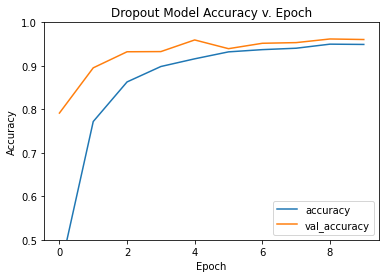

In [17]:
plt.plot(dropout_history.history['accuracy'], label='accuracy')
plt.plot(dropout_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Dropout Model Accuracy v. Epoch')
test_loss, test_acc = dropout_mod.evaluate(test_images,  test_labels, verbose=2)
plt.savefig("dropout_mod.png")

In [19]:
sig_mod = models.Sequential()
sig_mod.add(layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)))
sig_mod.add(layers.MaxPooling2D((2, 2),padding = 'same'))
sig_mod.add(Dropout(0.2))
sig_mod.add(layers.Conv2D(32, (3, 3), activation='sigmoid'))
sig_mod.add(layers.MaxPooling2D((2, 2),padding = 'same'))
sig_mod.add(Dropout(0.2))
sig_mod.add(layers.Conv2D(32, (3, 3), activation='sigmoid'))
sig_mod.add(layers.MaxPooling2D((2, 2),padding = 'same'))
sig_mod.add(Dropout(0.2))
sig_mod.add(layers.Conv2D(64, (2, 2), activation='sigmoid'))
sig_mod.add(layers.MaxPooling2D((2, 2),padding = 'same'))
sig_mod.add(Dropout(0.2))
sig_mod.add(layers.Flatten())
sig_mod.add(layers.Dense(64, activation='sigmoid'))
sig_mod.add(layers.Dense(25))

In [20]:
sig_mod.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 6, 6, 32)         

In [21]:
sig_mod.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

sig_history = sig_mod.fit(train_images, train_labels, 
          validation_data = (test_images, test_labels), 
          epochs= 10, batch_size= 10)

Epoch 1/10
2746/2746 [==============================] - 16s 6ms/step - loss: 3.1910 - accuracy: 0.0424 - val_loss: 3.2112 - val_accuracy: 0.0201
Epoch 2/10
2746/2746 [==============================] - 16s 6ms/step - loss: 3.1109 - accuracy: 0.0683 - val_loss: 2.6215 - val_accuracy: 0.1514
Epoch 3/10
2746/2746 [==============================] - 16s 6ms/step - loss: 2.1797 - accuracy: 0.2872 - val_loss: 1.8122 - val_accuracy: 0.4138
Epoch 4/10
2746/2746 [==============================] - 16s 6ms/step - loss: 1.6984 - accuracy: 0.4332 - val_loss: 1.4349 - val_accuracy: 0.5059
Epoch 5/10
2746/2746 [==============================] - 16s 6ms/step - loss: 1.3741 - accuracy: 0.5344 - val_loss: 1.1813 - val_accuracy: 0.5767
Epoch 6/10
2746/2746 [==============================] - 16s 6ms/step - loss: 1.1342 - accuracy: 0.6098 - val_loss: 0.8819 - val_accuracy: 0.7068
Epoch 7/10
2746/2746 [==============================] - 16s 6ms/step - loss: 0.9476 - accuracy: 0.6713 - val_loss: 0.7271 - val_ac

225/225 - 1s - loss: 0.4440 - accuracy: 0.8509 - 761ms/epoch - 3ms/step


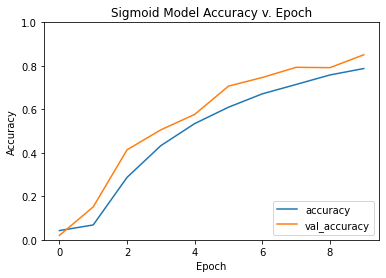

In [22]:
plt.plot(sig_history.history['accuracy'], label='accuracy')
plt.plot(sig_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Sigmoid Model Accuracy v. Epoch')
test_loss, test_acc = sig_mod.evaluate(test_images,  test_labels, verbose=2)
plt.savefig("sig_mod.png")

Data Augmentation - Rotating images and making other small adjustments to increase the size of the training set

In [23]:
from keras.preprocessing.image import ImageDataGenerator

In [24]:
data_augment = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=False, vertical_flip=False) 
data_augment.fit(train_images)

In [25]:
dataAug_mod = models.Sequential()
dataAug_mod.add(layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1),activation='relu',padding = 'same'))
dataAug_mod.add(layers.MaxPooling2D((2, 2)))
dataAug_mod.add(Dropout(0.2))
dataAug_mod.add(layers.Conv2D(32, (3, 3), activation='relu',padding = 'same'))
dataAug_mod.add(layers.MaxPooling2D((2, 2)))
dataAug_mod.add(Dropout(0.2))
dataAug_mod.add(layers.Conv2D(64, (3, 3), activation='relu',padding = 'same'))
dataAug_mod.add(layers.MaxPooling2D((2, 2)))
dataAug_mod.add(Dropout(0.2))
dataAug_mod.add(layers.Conv2D(64, (2, 2), activation='relu',padding = 'same'))
dataAug_mod.add(layers.MaxPooling2D((2, 2)))
dataAug_mod.add(Dropout(0.2))
dataAug_mod.add(layers.Flatten())
dataAug_mod.add(layers.Dense(64, activation='relu'))
dataAug_mod.add(layers.Dense(25))

In [26]:
dataAug_mod.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 7, 7, 32)         

In [27]:
dataAug_mod.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

dataAug_history = dataAug_mod.fit(train_images, train_labels, 
          validation_data = (test_images, test_labels), 
          epochs= 10, batch_size= 10)

Epoch 1/10
2746/2746 [==============================] - 21s 8ms/step - loss: 2.0066 - accuracy: 0.3621 - val_loss: 0.6475 - val_accuracy: 0.7994
Epoch 2/10
2746/2746 [==============================] - 20s 7ms/step - loss: 0.5831 - accuracy: 0.7903 - val_loss: 0.3789 - val_accuracy: 0.8737
Epoch 3/10
2746/2746 [==============================] - 20s 7ms/step - loss: 0.3518 - accuracy: 0.8769 - val_loss: 0.2299 - val_accuracy: 0.9308
Epoch 4/10
2746/2746 [==============================] - 20s 7ms/step - loss: 0.2511 - accuracy: 0.9142 - val_loss: 0.1834 - val_accuracy: 0.9419
Epoch 5/10
2746/2746 [==============================] - 20s 7ms/step - loss: 0.1915 - accuracy: 0.9347 - val_loss: 0.1390 - val_accuracy: 0.9619
Epoch 6/10
2746/2746 [==============================] - 20s 7ms/step - loss: 0.1666 - accuracy: 0.9441 - val_loss: 0.1454 - val_accuracy: 0.9561
Epoch 7/10
2746/2746 [==============================] - 20s 7ms/step - loss: 0.1386 - accuracy: 0.9537 - val_loss: 0.1371 - val_ac

225/225 - 1s - loss: 0.1425 - accuracy: 0.9685 - 1s/epoch - 5ms/step


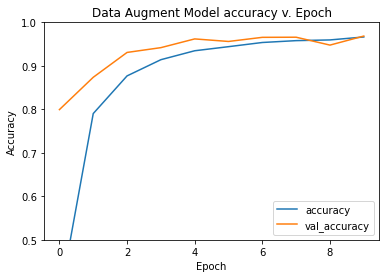

In [28]:
plt.plot(dataAug_history.history['accuracy'], label='accuracy')
plt.plot(dataAug_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("Data Augment Model accuracy v. Epoch")
test_loss, test_acc = dataAug_mod.evaluate(test_images,  test_labels, verbose=2)
plt.savefig("dataAug_mod.png")

In [29]:
from keras import regularizers

In [30]:
l1_mod = models.Sequential()
l1_mod.add(layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1),activation='relu', kernel_regularizer=regularizers.l1(0.01),padding = 'same'))
l1_mod.add(layers.MaxPooling2D((2, 2)))
l1_mod.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01),padding = 'same'))
l1_mod.add(layers.MaxPooling2D((2, 2)))
l1_mod.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01),padding = 'same'))
l1_mod.add(layers.MaxPooling2D((2, 2)))
l1_mod.add(layers.Conv2D(64, (2, 2), activation='relu',kernel_regularizer=regularizers.l1(0.01),padding = 'same'))
l1_mod.add(layers.MaxPooling2D((2, 2)))
l1_mod.add(layers.Flatten())
l1_mod.add(layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l1(0.01)))
l1_mod.add(layers.Dense(25))

In [31]:
l1_mod.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

l1_history = l1_mod.fit(train_images, train_labels, 
          validation_data = (test_images, test_labels), 
          epochs= 10, batch_size= 10)

Epoch 1/10
2746/2746 [==============================] - 17s 6ms/step - loss: 3.2192 - accuracy: 0.0444 - val_loss: 3.2005 - val_accuracy: 0.0229
Epoch 2/10
2746/2746 [==============================] - 16s 6ms/step - loss: 3.1777 - accuracy: 0.0445 - val_loss: 3.2037 - val_accuracy: 0.0201
Epoch 3/10
2746/2746 [==============================] - 16s 6ms/step - loss: 3.1770 - accuracy: 0.0440 - val_loss: 3.2013 - val_accuracy: 0.0229
Epoch 4/10
2746/2746 [==============================] - 16s 6ms/step - loss: 3.1766 - accuracy: 0.0463 - val_loss: 3.1981 - val_accuracy: 0.0201
Epoch 5/10
2746/2746 [==============================] - 17s 6ms/step - loss: 3.1767 - accuracy: 0.0459 - val_loss: 3.1993 - val_accuracy: 0.0201
Epoch 6/10
2746/2746 [==============================] - 16s 6ms/step - loss: 3.1764 - accuracy: 0.0478 - val_loss: 3.2001 - val_accuracy: 0.0229
Epoch 7/10
2746/2746 [==============================] - 17s 6ms/step - loss: 3.1763 - accuracy: 0.0437 - val_loss: 3.1954 - val_ac

225/225 - 1s - loss: 3.2001 - accuracy: 0.0229 - 1s/epoch - 5ms/step


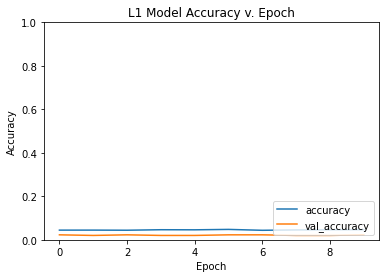

In [32]:
plt.plot(l1_history.history['accuracy'], label='accuracy')
plt.plot(l1_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title("L1 Model Accuracy v. Epoch")
test_loss, test_acc = l1_mod.evaluate(test_images,  test_labels, verbose=2)
plt.savefig("l1_mod.png")

In [33]:
l1_v2_mod = models.Sequential()
l1_v2_mod.add(layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1),activation='relu', padding = 'same'))
l1_v2_mod.add(layers.MaxPooling2D((2, 2)))
l1_v2_mod.add(layers.Conv2D(32, (3, 3), activation='relu',padding = 'same'))
l1_v2_mod.add(layers.MaxPooling2D((2, 2)))
l1_v2_mod.add(layers.Conv2D(64, (3, 3), activation='relu',padding = 'same'))
l1_v2_mod.add(layers.MaxPooling2D((2, 2)))
l1_v2_mod.add(layers.Conv2D(64, (2, 2), activation='relu',padding = 'same'))
l1_v2_mod.add(layers.MaxPooling2D((2, 2)))
l1_v2_mod.add(layers.Flatten())
l1_v2_mod.add(layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l1(0.01)))
l1_v2_mod.add(layers.Dense(25))

In [34]:
l1_v2_mod.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

l1_v2_history = l1_v2_mod.fit(train_images, train_labels, 
          validation_data = (test_images, test_labels), 
          epochs= 10, batch_size= 10)

Epoch 1/10
2746/2746 [==============================] - 19s 7ms/step - loss: 1.1090 - accuracy: 0.6738 - val_loss: 0.5371 - val_accuracy: 0.8408
Epoch 2/10
2746/2746 [==============================] - 20s 7ms/step - loss: 0.1435 - accuracy: 0.9770 - val_loss: 0.3627 - val_accuracy: 0.9175
Epoch 3/10
2746/2746 [==============================] - 18s 7ms/step - loss: 0.0773 - accuracy: 0.9910 - val_loss: 0.3174 - val_accuracy: 0.9292
Epoch 4/10
2746/2746 [==============================] - 18s 7ms/step - loss: 0.0759 - accuracy: 0.9864 - val_loss: 0.3090 - val_accuracy: 0.9388
Epoch 5/10
2746/2746 [==============================] - 18s 6ms/step - loss: 0.0505 - accuracy: 0.9923 - val_loss: 0.3692 - val_accuracy: 0.8984
Epoch 6/10
2746/2746 [==============================] - 18s 7ms/step - loss: 0.0485 - accuracy: 0.9937 - val_loss: 0.2733 - val_accuracy: 0.9463
Epoch 7/10
2746/2746 [==============================] - 18s 7ms/step - loss: 0.0361 - accuracy: 0.9945 - val_loss: 0.4834 - val_ac

225/225 - 1s - loss: 0.2095 - accuracy: 0.9516 - 1s/epoch - 5ms/step


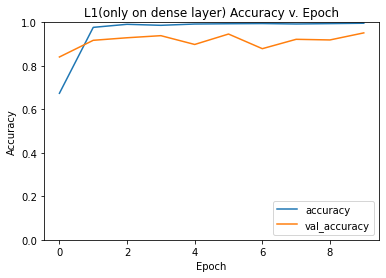

In [35]:
plt.plot(l1_v2_history.history['accuracy'], label='accuracy')
plt.plot(l1_v2_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title("L1(only on dense layer) Accuracy v. Epoch")
test_loss, test_acc = l1_v2_mod.evaluate(test_images,  test_labels, verbose=2)
plt.savefig("l1_v2_mod.png")

In [36]:
l2_mod = models.Sequential()
l2_mod.add(layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1),activation='relu', kernel_regularizer=regularizers.l2(0.05),padding = 'same'))
l2_mod.add(layers.MaxPooling2D((2, 2)))
l2_mod.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.05),padding = 'same'))
l2_mod.add(layers.MaxPooling2D((2, 2)))
l2_mod.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.05),padding = 'same'))
l2_mod.add(layers.MaxPooling2D((2, 2)))
l2_mod.add(layers.Conv2D(64, (2, 2), activation='relu',kernel_regularizer=regularizers.l2(0.05),padding = 'same'))
l2_mod.add(layers.MaxPooling2D((2, 2)))
l2_mod.add(layers.Flatten())
l2_mod.add(layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
l2_mod.add(layers.Dense(25))

In [37]:
l2_mod.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

l2_history = l2_mod.fit(train_images, train_labels, 
          validation_data = (test_images, test_labels), 
          epochs= 10, batch_size= 10)

Epoch 1/10
2746/2746 [==============================] - 19s 7ms/step - loss: 3.2755 - accuracy: 0.0462 - val_loss: 3.2001 - val_accuracy: 0.0201
Epoch 2/10
2746/2746 [==============================] - 18s 7ms/step - loss: 3.1777 - accuracy: 0.0445 - val_loss: 3.1995 - val_accuracy: 0.0229
Epoch 3/10
2746/2746 [==============================] - 18s 7ms/step - loss: 3.1771 - accuracy: 0.0458 - val_loss: 3.1991 - val_accuracy: 0.0201
Epoch 4/10
2746/2746 [==============================] - 18s 7ms/step - loss: 3.1770 - accuracy: 0.0456 - val_loss: 3.2001 - val_accuracy: 0.0201
Epoch 5/10
2746/2746 [==============================] - 18s 7ms/step - loss: 3.1768 - accuracy: 0.0457 - val_loss: 3.1942 - val_accuracy: 0.0201
Epoch 6/10
2746/2746 [==============================] - 19s 7ms/step - loss: 3.1765 - accuracy: 0.0447 - val_loss: 3.1996 - val_accuracy: 0.0201
Epoch 7/10
2746/2746 [==============================] - 18s 7ms/step - loss: 3.1763 - accuracy: 0.0451 - val_loss: 3.1999 - val_ac

225/225 - 1s - loss: 3.2013 - accuracy: 0.0201 - 1s/epoch - 6ms/step


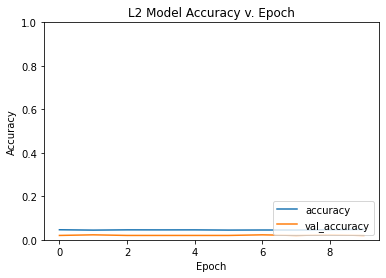

In [38]:
plt.plot(l2_history.history['accuracy'], label='accuracy')
plt.plot(l2_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title("L2 Model Accuracy v. Epoch")
test_loss, test_acc = l2_mod.evaluate(test_images,  test_labels, verbose=2)
plt.savefig("l2_mod.png")

In [39]:
l2_v2_mod = models.Sequential()
l2_v2_mod.add(layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1),activation='relu',padding = 'same'))
l2_v2_mod.add(layers.MaxPooling2D((2, 2)))
l2_v2_mod.add(layers.Conv2D(32, (3, 3), activation='relu',padding = 'same'))
l2_v2_mod.add(layers.MaxPooling2D((2, 2)))
l2_v2_mod.add(layers.Conv2D(64, (3, 3), activation='relu',padding = 'same'))
l2_v2_mod.add(layers.MaxPooling2D((2, 2)))
l2_v2_mod.add(layers.Conv2D(64, (2, 2), activation='relu',padding = 'same'))
l2_v2_mod.add(layers.MaxPooling2D((2, 2)))
l2_v2_mod.add(layers.Flatten())
l2_v2_mod.add(layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
l2_v2_mod.add(layers.Dense(25))

In [40]:
l2_v2_mod.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

l2_v2_history = l2_v2_mod.fit(train_images, train_labels, 
          validation_data = (test_images, test_labels), 
          epochs= 10, batch_size= 10)

Epoch 1/10
2746/2746 [==============================] - 18s 6ms/step - loss: 1.5714 - accuracy: 0.5249 - val_loss: 0.7298 - val_accuracy: 0.7833
Epoch 2/10
2746/2746 [==============================] - 17s 6ms/step - loss: 0.2023 - accuracy: 0.9566 - val_loss: 0.5285 - val_accuracy: 0.8687
Epoch 3/10
2746/2746 [==============================] - 17s 6ms/step - loss: 0.1112 - accuracy: 0.9831 - val_loss: 0.5122 - val_accuracy: 0.8606
Epoch 4/10
2746/2746 [==============================] - 17s 6ms/step - loss: 0.0745 - accuracy: 0.9911 - val_loss: 0.3550 - val_accuracy: 0.8946
Epoch 5/10
2746/2746 [==============================] - 17s 6ms/step - loss: 0.0542 - accuracy: 0.9926 - val_loss: 0.3704 - val_accuracy: 0.9014
Epoch 6/10
2746/2746 [==============================] - 17s 6ms/step - loss: 0.0710 - accuracy: 0.9873 - val_loss: 0.3798 - val_accuracy: 0.9070
Epoch 7/10
2746/2746 [==============================] - 17s 6ms/step - loss: 0.0499 - accuracy: 0.9919 - val_loss: 0.3820 - val_ac

225/225 - 1s - loss: 0.3501 - accuracy: 0.9172 - 1s/epoch - 5ms/step


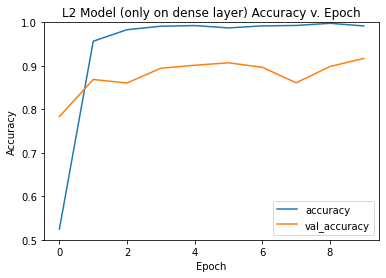

In [41]:
plt.plot(l2_v2_history.history['accuracy'], label='accuracy')
plt.plot(l2_v2_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('L2 Model (only on dense layer) Accuracy v. Epoch')

test_loss, test_acc = l2_v2_mod.evaluate(test_images,  test_labels, verbose=2)
plt.savefig("l2_v2_mod.png")